# Dynamical Decoupling (DD) Simulation

Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [5]:
import numpy as np
import scipy
import math
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [6]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [8]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.1s for the first 10s.
for t in range (0,100,1):
    t = t/10
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)

    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = np.linalg.eig(difference)
    max_eigenvalue = eigenvalues.max()
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    #print(epsilon)
    #print(A)
    #print(B)
    print(difference)
    time.append(t)


[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
[[ 6.64881923e-07+1.32798102e-05j  1.99327573e-03+5.28777777e-19j]
 [-1.99327573e-03-5.28777777e-19j  6.64881923e-07-1.32798102e-05j]]
[[ 1.05528113e-05+1.04961288e-04j  7.89284532e-03-1.66792650e-18j]
 [-7.89284532e-03+1.66792650e-18j  1.05528113e-05-1.04961288e-04j]]
[[ 5.27100751e-05+3.47142377e-04j  1.74611675e-02+1.40628722e-18j]
 [-1.74611675e-02-1.40628722e-18j  5.27100751e-05-3.47142377e-04j]]
[[ 0.00016347+7.99692854e-04j  0.03031298-2.63914900e-18j]
 [-0.03031298+2.63914900e-18j  0.00016347-7.99692854e-04j]]
[[ 0.00038949+1.50506814e-03j  0.04593082-1.03611442e-18j]
 [-0.04593082+1.03611442e-18j  0.00038949-1.50506814e-03j]]
[[ 0.0007838 +2.48418090e-03j  0.06368584+9.19437264e-19j]
 [-0.06368584-9.19437264e-19j  0.0007838 -2.48418090e-03j]]
[[ 0.00140124+3.73359295e-03j  0.08286316-1.76321815e-18j]
 [-0.08286316+1.76321815e-18j  0.00140124-3.73359295e-03j]]
[[ 0.00229338+5.22421918e-03j  0.10269061-6.62248989e-19j]
 [-0.10269061+6.62248989e

In [9]:
# simulating expression for the error matrix obtained from hand-calculation

error_matrix = []


for t in range(0,100,1):
    t = t/10
    E = I*math.sin(t*math.sqrt(1+lambda_value**2))**2 + (-1*math.sin(t*math.sqrt(1+lambda_value**2))**2)*(I*(1-lambda_value**2)+2*lambda_value*X*Z)/math.sqrt(1+lambda_value**2)
    
    # get maximum eigen value
    ev,_ = np.linalg.eig(E)
    max_ev = ev.max()

    # add maximum eigen value to the array error_matrix
    error_matrix.append(max_ev)

    print(E)

[[0. 0.]
 [0. 0.]]
[[ 0.00015012  0.00200322]
 [-0.00200322  0.00015012]]
[[ 0.00059442  0.00793221]
 [-0.00793221  0.00059442]]
[[ 0.00131503  0.01754826]
 [-0.01754826  0.00131503]]
[[ 0.00228292  0.03046417]
 [-0.03046417  0.00228292]]
[[ 0.00345912  0.0461599 ]
 [-0.0461599   0.00345912]]
[[ 0.00479628  0.06400348]
 [-0.06400348  0.00479628]]
[[ 0.00624055  0.08327645]
 [-0.08327645  0.00624055]]
[[ 0.00773379  0.10320279]
 [-0.10320279  0.00773379]]
[[ 0.00921587  0.12298019]
 [-0.12298019  0.00921587]]
[[ 0.01062711  0.14181234]
 [-0.14181234  0.01062711]]
[[ 0.01191069  0.15894096]
 [-0.15894096  0.01191069]]
[[ 0.01301493  0.17367639]
 [-0.17367639  0.01301493]]
[[ 0.01389537  0.18542532]
 [-0.18542532  0.01389537]]
[[ 0.01451655  0.19371468]
 [-0.19371468  0.01451655]]
[[ 0.01485348  0.19821073]
 [-0.19821073  0.01485348]]
[[ 0.01489257  0.19873241]
 [-0.19873241  0.01489257]]
[[ 0.01463226  0.19525874]
 [-0.19525874  0.01463226]]
[[ 0.01408303  0.18792956]
 [-0.18792956  0.01

In [10]:
other_A = []
for t in range(0,100,1):
    t = t/10
    #A1 = (I*math.cos(t*math.sqrt(1+lambda_value**2))-1j*math.sin(t*math.sqrt(1+lambda_value**2))*(Z+lambda_value*X)/math.sqrt(1+lambda_value**2))
    #A2 = (I*math.cos(t*math.sqrt(1+lambda_value**2))-1j*math.sin(t*math.sqrt(1+lambda_value**2))*(Z-lambda_value*X)/math.sqrt(1+lambda_value**2))

    #works ->
    #A1 = I*math.cos(t*math.sqrt(1+lambda_value**2))**2 - 1j*math.cos(t*math.sqrt(1+lambda_value**2))*math.sin(t*math.sqrt(1+lambda_value**2))*(Z-lambda_value**2)/math.sqrt(1+lambda_value**2)
    #A2 = -1j*math.sin(t*math.sqrt(1+lambda_value**2))*math.cos(t*math.sqrt(1+lambda_value**2))*(Z+lambda_value**2)/math.sqrt(1+lambda_value**2)
    #A3 = (-1*math.sin(t*math.sqrt(1+lambda_value**2))**2)*(Z+lambda_value*X)*(Z-lambda_value*X)/math.sqrt(1+lambda_value**2) 
   
    #A1 = I*math.cos(t*math.sqrt(1+lambda_value**2))**2 -2j*math.cos(t*math.sqrt(1+lambda_value**2))*math.sin(t*math.sqrt(1+lambda_value**2))*Z
    #A2 = (-1*math.sin(t*math.sqrt(1+lambda_value**2))**2)*(I+2*lambda_value*X*Z-I*lambda_value**2)/math.sqrt(1+lambda_value**2)

    #A1 = I*math.cos(t*math.sqrt(1+lambda_value**2))**2 -1j*math.sin(2*t*math.sqrt(1+lambda_value**2))*Z/math.sqrt(1+lambda_value**2)
    #A2 = (-1*math.sin(t*math.sqrt(1+lambda_value**2))**2)*(I+2*lambda_value*X*Z-I*lambda_value**2)/math.sqrt(1+lambda_value**2)

    #A1 = I/2 + I*math.cos(2*t*math.sqrt(1+lambda_value**2))/2 -1j*math.sin(2*t*math.sqrt(1+lambda_value**2))*Z/math.sqrt(1+lambda_value**2)
    #A2 = (-1*math.sin(t*math.sqrt(1+lambda_value**2))**2)*(I*(1-lambda_value**2)+2*lambda_value*X*Z)/math.sqrt(1+lambda_value**2)

    #A1 = I*math.cos(2*t*math.sqrt(1+lambda_value**2))-1j*math.sin(2*t*math.sqrt(1+lambda_value**2))*Z/math.sqrt(1+lambda_value**2)
    #A2 = I/2 - I*math.cos(2*t*math.sqrt(1+lambda_value**2))/2 + (-1*math.sin(t*math.sqrt(1+lambda_value**2))**2)*(I*(1-lambda_value**2)+2*lambda_value*X*Z)/math.sqrt(1+lambda_value**2)

    A1 = I*math.cos(2*t*math.sqrt(1+lambda_value**2))-1j*math.sin(2*t*math.sqrt(1+lambda_value**2))*Z/math.sqrt(1+lambda_value**2)
    A2 = I*math.sin(t*math.sqrt(1+lambda_value**2))**2 + (-1*math.sin(t*math.sqrt(1+lambda_value**2))**2)*(I*(1-lambda_value**2)+2*lambda_value*X*Z)/math.sqrt(1+lambda_value**2)

    #A1 = expm(-2j*Z*t)
    #A2 = I*math.sin(t*math.sqrt(1+lambda_value**2))**2 + (-1*math.sin(t*math.sqrt(1+lambda_value**2))**2)*(I*(1-lambda_value**2)+2*lambda_value*X*Z)/math.sqrt(1+lambda_value**2)
    
    #A1 = I - 1j*(Z+lambda_value*X)*t + 0.5*(1j*(Z+lambda_value*X)*t)**2 
    #A2 = I - 1j*(Z-lambda_value*X)*t + 0.5*(1j*(Z-lambda_value*X)*t)**2 

    
    B = expm(-2j*Z*t)
    
    #difference = (A1*A2) - B
    difference = (A1 + A2) - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = np.linalg.eig(difference)
    max_eigenvalue = eigenvalues.max()
    other_A.append(max_eigenvalue)
    print(difference)

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
[[-4.85459712e-05+1.32798102e-05j  2.00321731e-03+0.00000000e+00j]
 [-2.00321731e-03+0.00000000e+00j -4.85459712e-05-1.32798102e-05j]]
[[-0.00018431+0.00010496j  0.00793221+0.j        ]
 [-0.00793221+0.j         -0.00018431-0.00010496j]]
[[-0.00037838+0.00034714j  0.01754826+0.j        ]
 [-0.01754826+0.j         -0.00037838-0.00034714j]]
[[-0.00058491+0.00079969j  0.03046417+0.j        ]
 [-0.03046417+0.j         -0.00058491-0.00079969j]]
[[-0.00074447+0.00150507j  0.0461599 +0.j        ]
 [-0.0461599 +0.j         -0.00074447-0.00150507j]]
[[-0.0007885 +0.00248418j  0.06400348+0.j        ]
 [-0.06400348+0.j         -0.0007885 -0.00248418j]]
[[-0.00064452+0.00373359j  0.08327645+0.j        ]
 [-0.08327645+0.j         -0.00064452-0.00373359j]]
[[-0.00024189+0.00522422j  0.10320279+0.j        ]
 [-0.10320279+0.j         -0.00024189-0.00522422j]]
[[ 0.00048231+0.00690165j  0.12298019+0.j        ]
 [-0.12298019+0.j          0.00048231-0.00690165j]]
[[ 0.0

## Graph t vs $\epsilon$

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


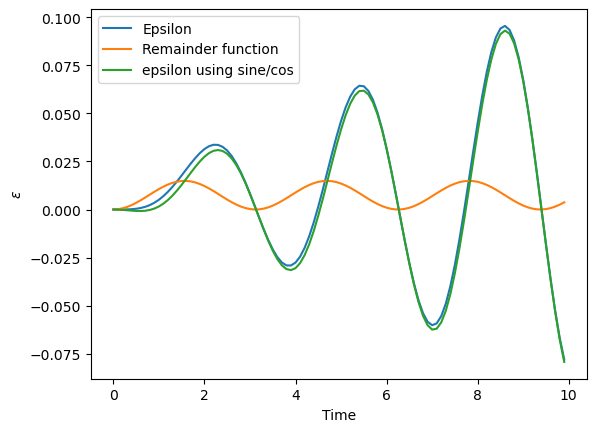

In [12]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")
plt.plot(time, error_matrix, label = "Remainder function")
plt.plot(time, other_A, label = "epsilon using sine/cos")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('my_graph.png')
plt.show()
